# Recommendation system

1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)
2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 50 or more number of ratings )
3. Build Popularity Recommender model.
4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
5. Build Collaborative Filtering model.
6. Evaluate the above model. ( Once the model is trained on the training data, it can be
used to compute the error (like RMSE) on predictions made on the test data.) You can
also use a different method to evaluate the models.
7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to
each user based on his/her habits, we will recommend 5 new products.
8. Summarise your insights.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving ratings_Electronics.csv to ratings_Electronics.csv


In [0]:
Col_names=['User_ID','Product_ID','Rating','Timestamp']

In [0]:
df_Rating_Elec=pd.read_csv('ratings_Electronics.csv',names=Col_names)

In [28]:
df_Rating_Elec.shape

(7824482, 4)

In [29]:
df_Rating_Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
User_ID       object
Product_ID    object
Rating        float64
Timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [30]:
df_Rating_Elec.head()

,User_ID,Product_ID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [31]:
df_Rating_Elec["Rating"].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Rating, dtype: int64

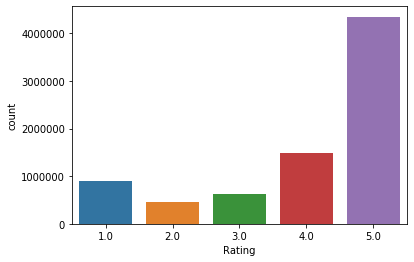

In [32]:
sns.countplot(data=df_Rating_Elec,x="Rating")

In [33]:
df_Rating_Elec.tail()

,User_ID,Product_ID,Rating,Timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [34]:
df_Rating_Elec.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


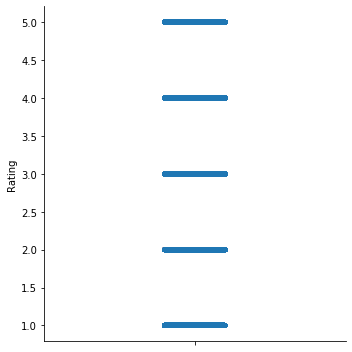

In [35]:
sns.catplot(data=df_Rating_Elec,y="Rating")

The column Timestamp can be dropped

In [0]:
df_Rating_Elec_1=df_Rating_Elec.drop('Timestamp',axis=1)

Let us take a subset of the dataset

In [0]:
df_Count=pd.DataFrame(df_Rating_Elec_1.groupby('User_ID')['Rating'].count()) 

In [0]:
df_Count=df_Count[df_Count['Rating']>=50]

In [0]:
df_Count=df_Count.rename(columns={"User_ID":"User_ID","Rating":"Rating_Count"})

In [42]:
df_Count.head()

,Rating_Count
User_ID,
A100UD67AHFODS,116
A100WO06OQR8BQ,132
A105S56ODHGJEK,68
A105TOJ6LTVMBG,71
A10AFVU66A79Y1,65


In [0]:
df_Rating_Elec_2=pd.merge(df_Rating_Elec_1,df_Count,left_on='User_ID',right_on='User_ID',how='inner')

In [44]:
df_Rating_Elec_2.head()

,User_ID,Product_ID,Rating,Rating_Count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [45]:
df_Rating_Elec_2.shape

(125871, 4)

In [47]:
df_Rating_Elec_2['Product_ID'].nunique()

48190

In [48]:
df_Rating_Elec_2['User_ID'].nunique()

1540

In [49]:
df_Rating_Elec_2['Rating'].value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: Rating, dtype: int64

The Data Frame df_Rating_Elec_2 is the subset of original dataset.

**Popularity Based Recommendation Model**

In popularity based recommendation model, the columns Product Id and Rating will decide which product to be recommended

**Calculating the Mean Rating for each Product:**

In [0]:
df_Ratings_Mean = pd.DataFrame(df_Rating_Elec_2.groupby('Product_ID')['Rating'].mean()) 

In [0]:
df_Ratings_Mean['Rating_count'] = pd.DataFrame(df_Rating_Elec_2.groupby('Product_ID')['Rating'].count())  

In [54]:
df_Ratings_Mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48190 entries, 0594451647 to B00LKG1MC8
Data columns (total 2 columns):
Rating          48190 non-null float64
Rating_count    48190 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.1+ MB


In [55]:
df_Ratings_Mean.head(10)

,Rating,Rating_count
Product_ID,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
1400501520,5.000000,1
1400501776,4.500000,2
1400532620,3.000000,2
1400532655,3.833333,6


In [56]:
df_Ratings_Mean.shape

(48190, 2)

Let us filter the above dataset based on the number of Ratings and consider those products whose Count of Rating should be greater than 75.

In [0]:
df_Ratings_Mean_filetered=df_Ratings_Mean[df_Ratings_Mean['Rating_count']>=75]

In [67]:
df_Ratings_Mean_filetered.shape

(35, 2)

In [68]:
df_Ratings_Mean_filetered.head()

,Rating,Rating_count
Product_ID,,
B000N99BBC,4.772455,167
B000QUUFRW,4.809524,84
B0015DYMVO,4.250000,76
B0019EHU8G,4.855556,90
B001TH7GUU,4.871795,78


In [0]:
# Here are the list of 10 product which we can recommend through popularity recommender model

In [69]:
df_Ratings_Mean_filetered.sort_values(by='Rating',ascending=False).head(10)

,Rating,Rating_count
Product_ID,,
B001TH7GUU,4.871795,78
B003ES5ZUU,4.864130,184
B0019EHU8G,4.855556,90
B000QUUFRW,4.809524,84
B000N99BBC,4.772455,167
B002WE6D44,4.770000,100
B007WTAJTO,4.701220,164
B002V88HFE,4.698113,106
B004CLYEDC,4.669492,118


**The above list consists of products having high rating as well as Rated at least 75 times**.

**Collaborative Filtering Based Recommendation**

In [70]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678211 sha256=8b3dba60a37b00855c8e908648c95c163954dea1910c57ef8f2809a62d7cfc30
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [72]:
df_Rating_Elec_2.head()

,User_ID,Product_ID,Rating,Rating_Count
0,A3BY5KCNQZXV5U,0594451647,5.0,50
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50
2,A3BY5KCNQZXV5U,B000063574,5.0,50
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50


In [0]:
from surprise import Reader, Dataset
reader = Reader()
Data_CF = Dataset.load_from_df(df_Rating_Elec_2[['User_ID', 'Product_ID', 'Rating']], reader)

In [0]:
Train_data, Test_data = train_test_split(Data_CF, test_size=0.3)

In [0]:
from surprise import SVD

In [80]:
Model = SVD()
Model.fit(Train_data)

In [0]:
Y_Predict = Model.test(Test_data)

**Test Data Accuracy of Model:**

In [82]:
accuracy.rmse(Y_Predict, verbose=True)

RMSE: 0.9805


0.9804783028396342

In [88]:
def get_Iu(U_ID):
    try:
        return len(Train_data.ur[Train_data.to_inner_uid(U_ID)])
    except ValueError: 
        return 0
#Returns the number of item Rated by Given User 
    
def get_Ui(I_ID):
    try: 
        return len(Train_data.ir[Train_data.to_inner_iid(I_ID)])
    except ValueError:
        return 0

#Returns the number of Users that have rated the given Item
    
Result_DF = pd.DataFrame(Y_Predict, columns=['U_ID', 'I_ID', 'RUI', 'EST', 'DETAILS'])
Result_DF['Iu'] = Result_DF.U_ID.apply(get_Iu)
Result_DF['Ui'] = Result_DF.I_ID.apply(get_Ui)
Result_DF['err'] = abs(Result_DF.EST - Result_DF.RUI)
Result_DF.head()

,U_ID,I_ID,RUI,EST,DETAILS,Iu,Ui,err
0,A3F7USIDJBR8WU,B005CT56F8,5.0,4.347950,{'was_impossible': False},58,57,0.652050
1,AR1T36GLLAFFX,B0017UCTX8,5.0,4.344919,{'was_impossible': False},43,0,0.655081
2,AQ2FC1DLKVD8H,B005KAK2FI,5.0,4.566521,{'was_impossible': False},61,7,0.433479
3,A2F2GLVFRNV7JJ,B005DBEA52,5.0,4.346182,{'was_impossible': False},50,2,0.653818
4,A1NGFGBX2VCQS8,B008HO9D7M,5.0,3.880922,{'was_impossible': False},95,0,1.119078


Let us sort for best and worst predictions

In [0]:
Best_Predictions = Result_DF.sort_values(by='err')[:10]
Worst_Predictions = Result_DF.sort_values(by='err')[-10:]

In [90]:
Best_Predictions

,U_ID,I_ID,RUI,EST,DETAILS,Iu,Ui,err
11900,A2L36AGL8CKY3D,B001TH7T2U,5.0,5.0,{'was_impossible': False},39,34,0.0
19238,AG7EF0SVBQOUX,B000F7QRTG,5.0,5.0,{'was_impossible': False},76,15,0.0
11295,A1TQZUSOU22E9M,B003ES5ZUU,5.0,5.0,{'was_impossible': False},87,124,0.0
32929,A3JNBO7H2SPL44,B000067RT6,5.0,5.0,{'was_impossible': False},29,29,0.0
6834,A3RGJ1FXOB1ZLL,B005EOWBHC,5.0,5.0,{'was_impossible': False},57,16,0.0
29790,AH3LF9RAD1O2V,B002WE6D44,5.0,5.0,{'was_impossible': False},40,70,0.0
32947,A31N0XY2UTB25C,B00316263Y,5.0,5.0,{'was_impossible': False},166,24,0.0
6799,A2FXBWR4T4OFQ,B00007GQLU,5.0,5.0,{'was_impossible': False},52,19,0.0
1790,A2YEZ8Z3BW2SKG,B00017LSPI,5.0,5.0,{'was_impossible': False},47,35,0.0
24215,A2AY4YUOX2N1BQ,B0033PRWSW,5.0,5.0,{'was_impossible': False},212,9,0.0


In [91]:
Worst_Predictions

,U_ID,I_ID,RUI,EST,DETAILS,Iu,Ui,err
29422,A1D9V11QUHXENQ,B004LSNF04,1.0,4.853919,{'was_impossible': False},44,11,3.853919
15273,AQSV34W54L0VO,B005VULWEC,1.0,4.855213,{'was_impossible': False},44,1,3.855213
23124,A2RS66Y79Q8X0W,B007PJ4Q4A,1.0,4.855569,{'was_impossible': False},37,13,3.855569
27716,A1X1CEGHTHMBL1,B000NVLQ72,1.0,4.865770,{'was_impossible': False},149,3,3.865770
30160,A1FR68QH6Z4YZM,B001F7AHXW,1.0,4.880878,{'was_impossible': False},75,3,3.880878
11166,A2AF0NOCM71J0B,B000VE2RP6,1.0,4.891235,{'was_impossible': False},85,16,3.891235
2014,A17W0GMB0YY83M,B00834SJSK,1.0,4.958454,{'was_impossible': False},44,71,3.958454
23787,A12EVK82QUTSA6,B00829TIA4,1.0,4.964156,{'was_impossible': False},56,68,3.964156
19438,AZMY6E8B52L2T,B004R7P28W,1.0,5.000000,{'was_impossible': False},124,11,4.000000
18008,A2D0CO1OA6DSWY,B004N625B4,1.0,5.000000,{'was_impossible': False},34,15,4.000000


Observations:
1. The Model is not able to return estimated rating close to given rating by User in case when User has rated a product low (ie 1) leading to high error. This could be due to Gray Sheep.

2. The Problem of Cold Start is minimal.